In [1]:
import numpy as np

In [2]:
class SVM():
    def __init__(self,learning_rate=0.001,lamda=0.5,epoch=1000):
        self.learning_rate=learning_rate
        self.lamda=lamda
        self.epoch=epoch
        self.W=None
        self.b=None
    
    def f(self,X,i):
        t=(np.dot(X[i],self.W))+self.b
        return t;
    
    def loss(self,X,y):
        sample_size,features=X.shape
        loss1=0
        for i in range (sample_size):
            b=(self.f(X,i)*y[i])
            if b>=1:
                loss1=loss1
            else:
                loss1+=1-b
        loss1/=sample_size
        return (self.lamda*((self.W)**2)+loss1)[0][0]
            
    
    
    def fit(self,X,y):
        sample_size,features=X.shape
        self.W = np.random.randn(features, 1) * 0.01
        self.b=0
        for j in range (self.epoch):
            if (j%10==0):print("loss=",self.loss(X,y))
            for i in range(sample_size):
                if (y[i]*self.f(X,i))>=1:
                    self.W=self.W-self.learning_rate*2*self.lamda*self.W
                    
                else:
                    self.W=self.W-self.learning_rate*(2*self.lamda*self.W-y[i]*X[i].reshape(-1,1))
                    self.b=self.b+self.learning_rate*y[i]
                
                
        
    def predict(self,X):
        sample_size,features=X.shape
        ypred=np.zeros(sample_size)
        for i in range(sample_size):
            if (np.dot(self.W.T,X[i])[0]+self.b)>0:
                ypred[i]=1
            else:
                ypred[i]=-1
        return ypred
    
        
    
    

Dataset shape: (10000, 5)

Class distribution:
Class -1: 5119
Class 1: 4881

Feature statistics before scaling:
Mean of each feature: [-0.02210191  0.02330768 -0.00899805  0.00080614  0.01365279]
Std of each feature: [1.22196594 1.22538239 1.23267621 1.227504   1.219894  ]

Feature statistics after scaling:
Mean of each feature: [-1.27231559e-17  7.24559301e-17  3.34177130e-17  3.77475828e-17
  6.45816733e-17]
Std of each feature: [1. 1. 1. 1. 1.]


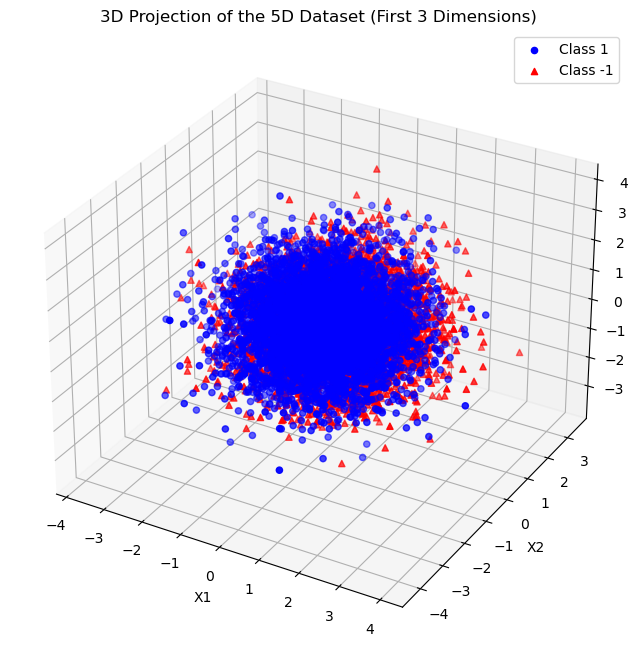


Is the dataset linearly separable? False


In [20]:
"""CODE GENERATED FROM CLAUDE.AI FOR TESTING

"""


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

def generate_5d_linearly_separable_data(n_samples=10000, noise=0.7):
    """
    Generate a 5D linearly separable dataset
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate
    noise : float
        Amount of noise to add to make the data more realistic
    
    Returns:
    --------
    X : array of shape [n_samples, 5]
        The input features
    y : array of shape [n_samples]
        The class labels (0 or 1)
    """
    # Generate random weights for the separating hyperplane
    w = np.random.randn(5)
    # Normalize the weights
    w = w / np.linalg.norm(w)
    
    # Generate random points
    X = np.random.randn(n_samples, 5)
    
    # Calculate projection onto the weight vector
    proj = np.dot(X, w)
    
    # Assign labels based on which side of the hyperplane the points lie
    y = np.ones(n_samples)
    y[proj < 0] = -1
    
    # Add some noise to make it more realistic
    X += noise * np.random.randn(n_samples, 5)
    
    return X, y

def visualize_3d_projection(X, y):
    """
    Visualize the first 3 dimensions of the dataset
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points for each class
    ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 
              c='blue', marker='o', label='Class 1')
    ax.scatter(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 
              c='red', marker='^', label='Class -1')
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.title('3D Projection of the 5D Dataset (First 3 Dimensions)')
    plt.show()

# Generate the dataset
X, y = generate_5d_linearly_separable_data(n_samples=10000, noise=0.7)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print some basic statistics
print("Dataset shape:", X.shape)
print("\nClass distribution:")
print("Class -1:", np.sum(y == -1))
print("Class 1:", np.sum(y == 1))
print("\nFeature statistics before scaling:")
print("Mean of each feature:", X.mean(axis=0))
print("Std of each feature:", X.std(axis=0))
print("\nFeature statistics after scaling:")
print("Mean of each feature:", X_scaled.mean(axis=0))
print("Std of each feature:", X_scaled.std(axis=0))

# Visualize the first 3 dimensions
visualize_3d_projection(X_scaled, y)

# Test linear separability
def check_separability(X, y):
    # Simple check using the projection onto the first principal component
    projections = np.dot(X, np.random.randn(5))
    min_positive = np.min(projections[y == 1])
    max_negative = np.max(projections[y == -1])
    return min_positive > max_negative

print("\nIs the dataset linearly separable?", check_separability(X_scaled, y))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [22]:
svm1=SVM(epoch=100)
svm1.fit(x_train,y_train)

loss= 1.0051220015438496
loss= 0.671887835451338
loss= 0.671887835451338
loss= 0.671887835451338
loss= 0.671887835451338
loss= 0.671887835451338
loss= 0.671887835451338
loss= 0.671887835451338
loss= 0.671887835451338
loss= 0.671887835451338


In [23]:
y_pred=svm1.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.826
